In [23]:
## importing libraries
import pandas as pd
import leafmap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [24]:
## importing dataframe
location=pd.read_excel('LAGOS_clean.xlsx')

In [25]:
## defining the number of clusters to split the data into
def optimise_k_means(location, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(location)
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(means, inertias, 'o-')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Inertia')
    ax.set_title('Elbow Method for Optimal k')
    ax.grid(True)
    plt.show()

In [26]:
import matplotlib.pyplot as plt

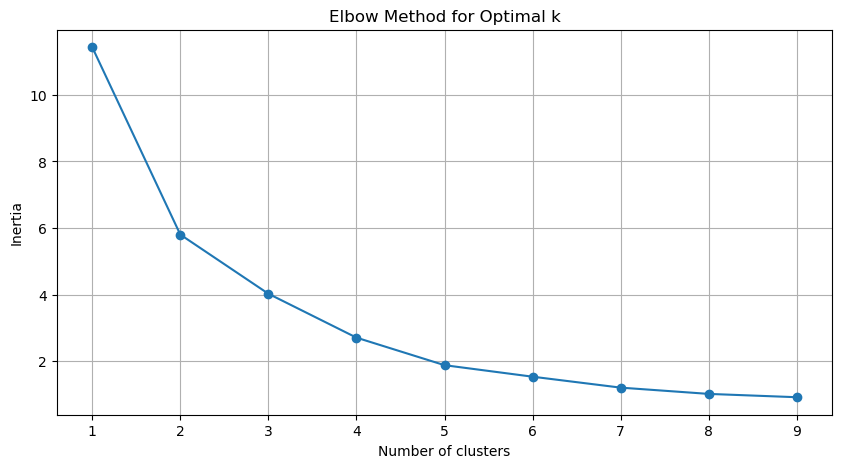

In [27]:
optimise_k_means(location[['Latitude', 'Longitude']], 10)

In [28]:
kmeans=KMeans(n_clusters=3)

In [29]:
kmeans.fit(location[['Latitude', 'Longitude']])

KMeans(n_clusters=3)

In [30]:
location['kmeans_3']=kmeans.labels_

In [31]:
import plotly.express as px

In [32]:
print(location['kmeans_3'].unique())

[0 1 2]


In [33]:
ward_labels = {0: 'Ward C', 1: 'Ward A', 2: 'Ward B'}

location['ward'] = location['kmeans_3'].map(ward_labels)

fig = px.scatter(location, x='Latitude', y='Longitude', color='ward',
                 title='Clusters Grouped into Wards', 
                 labels={'Latitude': 'Latitude', 'Longitude': 'Longitude', 'ward': 'Ward'})

fig.update_traces(marker=dict(size=8, opacity=0.8))
fig.update_layout(showlegend=True)

fig.show()

In [34]:
pd.set_option('display.max_rows', None)

In [35]:
fig = px.scatter_mapbox(location, lat='Latitude', lon='Longitude', color='ward',
                        title='Clustered Polling units',
                        hover_data=['new_puname', 'APC', 'LP', 'PDP', 'NNPP'],
                        labels={'Latitude': 'Latitude', 'Longitude': 'Longitude', 'ward': 'Ward'},
                        color_discrete_sequence=px.colors.qualitative.D3,
                        zoom=10, height=600)

fig.update_traces(marker=dict(size=10, opacity=0.8))


fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin=dict(l=0, r=0, t=30, b=0))
fig.update_layout(showlegend=True)


fig.update_layout(legend=dict(title='Ward', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))


fig.update_layout(legend_title_font_size=15)

fig.update_layout(title_x=0.5, font_family='Cambria Math')

fig.show()

In [36]:
import folium

In [37]:
outlier=pd.read_csv('outlier.csv')

In [38]:
outlier=outlier.rename(columns={'APC z-score':'apc_outliers','LP z-score':'lp_outliers','PDP z-score':'pdp_outliers','NNPP z-score':'nnpp_outliers'})

In [39]:
## identifying top-5 outliers for each party and their close polling units
outliers_apc = outlier.nlargest(3, 'apc_outliers')
outliers_lp = outlier.nlargest(3, 'lp_outliers')
outliers_pdp = outlier.nlargest(3, 'pdp_outliers')
outliers_nnpp= outlier.nlargest(3, 'nnpp_outliers')


map_center = [outlier['Latitude'].mean(), outlier['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)


for _, row in outlier.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        tooltip=row['new_puname'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

    
def plot_neighboring_locations(top_outliers, color):
    for _, row in top_outliers.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            tooltip=f"Outlier: {row['new_puname']}",
            icon=folium.Icon(color=color, icon='exclamation-sign')
        ).add_to(m)


plot_neighboring_locations(outliers_apc, 'red')
plot_neighboring_locations(outliers_lp, 'green')
plot_neighboring_locations(outliers_pdp, 'orange')
plot_neighboring_locations(outliers_nnpp, 'purple')


In [40]:
m